In [11]:
# ASN Pairings Mean MOS, Mean Qualfun, and Percentage "Bad" Calls

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import geoip2.database
import ipaddress
import os
import dask.dataframe as dd

In [13]:
# functions to get AS info
def getASobject(x):
    ip = ipaddress.ip_address(x)
    try: return readerASN.asn(str(ip))
    except: return "The address {} is not in the database.".format(ip)
def getIP(x):
    if type(x) == str: return x
    return x.ip_address
def getASN(x):
    if type(x) == str: return x
    return x.autonomous_system_number
def getASorg(x):
    if type(x) == str: return x
    return x.autonomous_system_organization
def getInt(x):
    return int(x)

In [14]:
def getcount(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df['a_saddr']
    df_new=df[df['a_saddr']==a][df['b_saddr']==b]

    return len(df_new)

def getbadcount(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df_filtered['a_saddr']
    df_new=df_filtered[df_filtered['a_saddr']==a][df_filtered['b_saddr']==b]

    return len(df_new)

def getbqualfunmean(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df['a_saddr']
    df_new=df[df['a_saddr']==a][df['b_saddr']==b]

    return df_new['b_qualfun'].mean()

def getmosmean(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df['a_saddr']
    df_new=df[df['a_saddr']==a][df['b_saddr']==b]

    return df_new['b_mos_adapt_mult10'].mean()

In [15]:
CSV_FILE_PATH = os.path.join('cdr_from_2018-05-01-order-calldate-asc.csv')

HEADER = ["ID","calldate","callend","duration","connect_duration","progress_time","first_rtp_time","caller",
          "caller_domain","caller_reverse","callername","callername_reverse","called","called_domain","called_reverse",
          "sipcallerip","sipcallerport","sipcalledip","sipcalledport","whohanged","bye","lastSIPresponse_id",
          "lastSIPresponseNum","sighup","dscp","a_index","b_index","a_payload","b_payload","a_saddr","b_saddr",
          "a_received","b_received","a_lost","b_lost","a_ua_id","b_ua_id","a_avgjitter_mult10","b_avgjitter_mult10",
          "a_maxjitter","b_maxjitter","a_sl1","a_sl2","a_sl3","a_sl4","a_sl5","a_sl6","a_sl7","a_sl8","a_sl9","a_sl10",
          "a_d50","a_d70","a_d90","a_d120","a_d150","a_d200","a_d300","b_sl1","b_sl2","b_sl3","b_sl4","b_sl5","b_sl6","b_sl7",
          "b_sl8","b_sl9","b_sl10","b_d50","b_d70","b_d90","b_d120","b_d150","b_d200","b_d300","a_mos_lqo_mult10",
          "b_mos_lqo_mult10","a_mos_f1_mult10","a_mos_f2_mult10","a_mos_adapt_mult10","b_mos_f1_mult10","b_mos_f2_mult10",
          "b_mos_adapt_mult10","a_rtcp_loss","a_rtcp_maxfr","a_rtcp_avgfr_mult10","a_rtcp_maxjitter","a_rtcp_avgjitter_mult10",
          "b_rtcp_loss","b_rtcp_maxfr","b_rtcp_avgfr_mult10","b_rtcp_maxjitter","b_rtcp_avgjitter_mult10","a_last_rtp_from_end",
          "b_last_rtp_from_end","payload","jitter_mult10","mos_min_mult10","a_mos_min_mult10","b_mos_min_mult10",
          "packet_loss_perc_mult1000","a_packet_loss_perc_mult1000","b_packet_loss_perc_mult1000","delay_sum","a_delay_sum",
          "b_delay_sum","delay_avg_mult100","a_delay_avg_mult100","b_delay_avg_mult100","delay_cnt","a_delay_cnt",
          "b_delay_cnt","rtcp_avgfr_mult10","rtcp_avgjitter_mult10","lost","id_sensor","price_operator_mult100",
          "price_operator_currency_id","price_customer_mult100","price_customer_currency_id","reason_sip_cause",
          "reason_sip_text_id","reason_q850_cause","reason_q850_text_id","caller_silence","called_silence",
          "caller_silence_end","called_silence_end","a_mos_xr_min_mult10","b_mos_xr_min_mult10","a_mos_xr_mult10",
          "b_mos_xr_mult10","response_time_100","response_time_xxx","a_mos_f1_min_mult10","a_mos_f2_min_mult10",
          "a_mos_adapt_min_mult10","b_mos_f1_min_mult10","b_mos_f2_min_mult10","b_mos_adapt_min_mult10","a_rtp_ptime",
          "b_rtp_ptime","flags"]

df = pd.read_csv(CSV_FILE_PATH,low_memory=False,names=HEADER)

In [16]:
def evaluaterow(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, delay_sum, connect_duration):

    calc_sum = get_sum(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10)

    final_sum = (delay_sum + calc_sum)/(connect_duration*1000) #+ calc_sum)

    return final_sum


def get_sum(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10):
    top_sum = 0
    n = 1
    w1 = 1
    w2 = 2
    w3 = 3
    w4 = 4
    w5 = 5
    w6 = 6
    w7 = 7
    w8 = 8
    w9 = 9
    w10 = 10

    top_sum += 20 * n * (a1) * (w1 - 1)
    n += 1
    top_sum += 20 * n * (a2) * (w2 - 1)
    n += 1
    top_sum += 20 * n * (a3) * (w3 - 1)
    n += 1
    top_sum += 20 * n * (a4) * (w4 - 1)
    n += 1
    top_sum += 20 * n * (a5) * (w5 - 1)
    n += 1
    top_sum += 20 * n * (a6) * (w6 - 1)
    n += 1
    top_sum += 20 * n * (a7) * (w7 - 1)
    n += 1
    top_sum += 20 * n * (a8) * (w8 - 1)
    n += 1
    top_sum += 20 * n * (a9) * (w9 - 1)
    n += 1
    top_sum += 20 * n * (a10) * (w10 - 1)

    return (top_sum)


df_qualfun_a = df.apply(lambda df2: evaluaterow(df2['a_sl1'],df2['a_sl2'],df2['a_sl3'],df2['a_sl4'],df2['a_sl5'],df2['a_sl6'],df2['a_sl7'],df2['a_sl8'],df2['a_sl9'],df2['a_sl10'],df2['a_delay_sum'],df2['connect_duration']), axis=1)


df_qualfun_b = df.apply(lambda df2: evaluaterow(df2['b_sl1'],df2['b_sl2'],df2['b_sl3'],df2['b_sl4'],df2['b_sl5'],df2['b_sl6'],df2['b_sl7'],df2['b_sl8'],df2['b_sl9'],df2['b_sl10'],df2['b_delay_sum'],df2['connect_duration']), axis=1)



#df = df.assign(qualfun=df_qualfun)
#df.compute()
#dfqf = df_qualfun.compute()

In [17]:
df['a_qualfun'] = df_qualfun_a
df['b_qualfun'] = df_qualfun_b

In [18]:
df.head()

,ID,calldate,callend,duration,connect_duration,progress_time,first_rtp_time,caller,caller_domain,caller_reverse,...,a_mos_f2_min_mult10,a_mos_adapt_min_mult10,b_mos_f1_min_mult10,b_mos_f2_min_mult10,b_mos_adapt_min_mult10,a_rtp_ptime,b_rtp_ptime,flags,a_qualfun,b_qualfun
0,76100359,2018-05-01 00:00:01,2018-05-01 00:00:13,12,5,1,2,604662xxxx,208.89.129.46,SANITIZED,...,45,45,45,45,39,20,20,\N,0.0,0.0
1,76100360,2018-05-01 00:00:03,2018-05-01 00:00:13,10,5,0,5,604662xxxx,192.102.254.81,SANITIZED,...,45,45,45,45,45,20,20,\N,0.0,0.0
2,76100543,2018-05-01 00:00:10,2018-05-01 00:03:19,189,178,2,2,SANITIZED,SANITIZED,SANITIZED,...,45,45,45,45,45,20,20,\N,0.0,0.0
3,76100542,2018-05-01 00:00:11,2018-05-01 00:03:19,188,178,1,1,1604930xxxx,192.102.254.82,SANITIZED,...,45,45,45,45,45,20,20,\N,0.0,0.0
4,76100418,2018-05-01 00:00:23,2018-05-01 00:01:08,45,44,0,1,708841xxxx,68.68.117.61,SANITIZED,...,45,45,45,45,45,20,20,\N,0.0,0.0


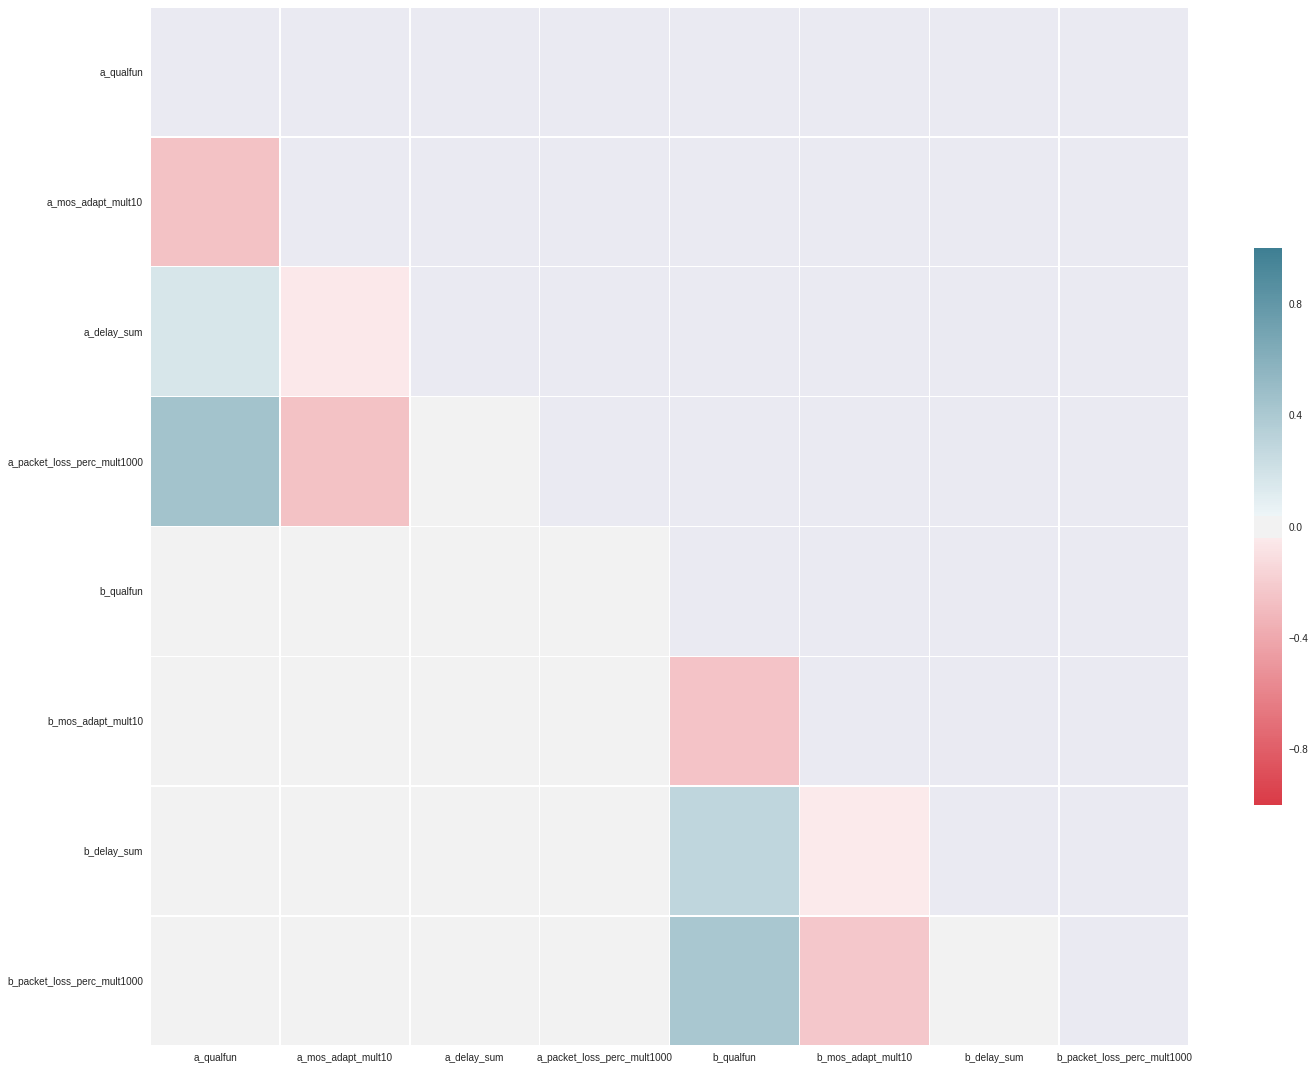

In [28]:
corr=df[['a_qualfun','a_mos_adapt_mult10','a_rtcp_avgjitter_mult10','a_delay_sum','a_packet_loss_perc_mult1000','b_qualfun','b_mos_adapt_mult10','b_rtcp_avgjitter_mult10','b_delay_sum','b_packet_loss_perc_mult1000']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['axes.labelsize'] = 10
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.tight_layout()
plt.savefig('./img/correlation_matrix_1millionstar.png', dpi=600)

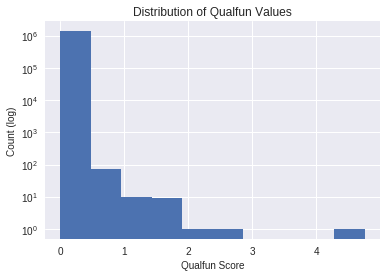

In [29]:
bqfarray=df['b_qualfun'].values
plt.hist(bqfarray,log=True)

Title='Distribution of Qualfun Values'
xLabel='Qualfun Score'
yLabel='Count (log)'


plt.title(Title)
plt.xlabel(xLabel)
plt.ylabel(yLabel)

plt.show
plt.savefig('./img/histogram_qualfun_1millionstar.png',dpi=600)

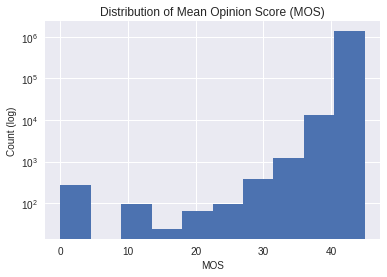

In [30]:
mosarray=df['b_mos_adapt_mult10'].values
plt.hist(mosarray,log=True)

Title='Distribution of Mean Opinion Score (MOS)'
xLabel='MOS'
yLabel='Count (log)'


plt.title(Title)
plt.xlabel(xLabel)
plt.ylabel(yLabel)


plt.show
plt.savefig('./img/histogram_weighted_qualfun_1millionstar.png',dpi=600)